# Stock Analysis with Web Scraping and Data Visualization in Python

In this data project we will see on exploratory data analysis of stock prices.


In [28]:
import pandas_datareader.data as data
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import pandoc as pc
import nbconvert as nb

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In this section we will see how to use pandas to directly read data from Stooq finance using pandas!


In [29]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

List of the ticker symbols (as strings) in alphabetical order is created

In [30]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names=['Bank Tickers','Stock info']

In [31]:
bank_stocks.head()

Bank Tickers      BAC                                                 C  \
Stock info       Open     High      Low    Close        Volume     Open   
Date                                                                      
2006-01-03    39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04    39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05    39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06    39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09    39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Tickers                                           ...       MS           \
Stock info       High      Low    Close        Volume  ...     Open     High   
Date                                                   ...                     
2006-01-03    408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04    406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05    403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06    404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09    403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Tickers                                      WFC                    \
Stock info        Low    Close        Volume     Open     High      Low   
Date                                                                      
2006-01-03    37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04    38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05    38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06    38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09    38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Tickers                         
Stock info      Close        Volume  
Date                                 
2006-01-03    22.9581  1.530724e+07  
2006-01-04    22.6917  1.510382e+07  
2006-01-05    22.6690  1.407726e+07  
2006-01-06    22.7983  1.167705e+07  
2006-01-09    22.7983  7.808415e+06  

[5 rows x 30 columns]

# EDA
Let's explore the data a bit


**Maximum closing stock price of each bank throughout this time period**

In [32]:
#for tick in tickers:
 #   print(tick,bank_stocks[tick]['Close'].max())
bank_stocks.xs(key='Close',axis=1,level='Stock info').max()   

Bank Tickers
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

𝑟𝑡=𝑝𝑡−𝑝𝑡−1𝑝𝑡−1=𝑝𝑡𝑝𝑡−1−1**

In [33]:
returns=pd.DataFrame()

In [34]:
for tick in tickers:
    returns[tick+ 'Return']=bank_stocks[tick]['Close'].pct_change()

In [35]:
returns.head(5)

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


Create a pairplot using seaborn of the returns dataframe.

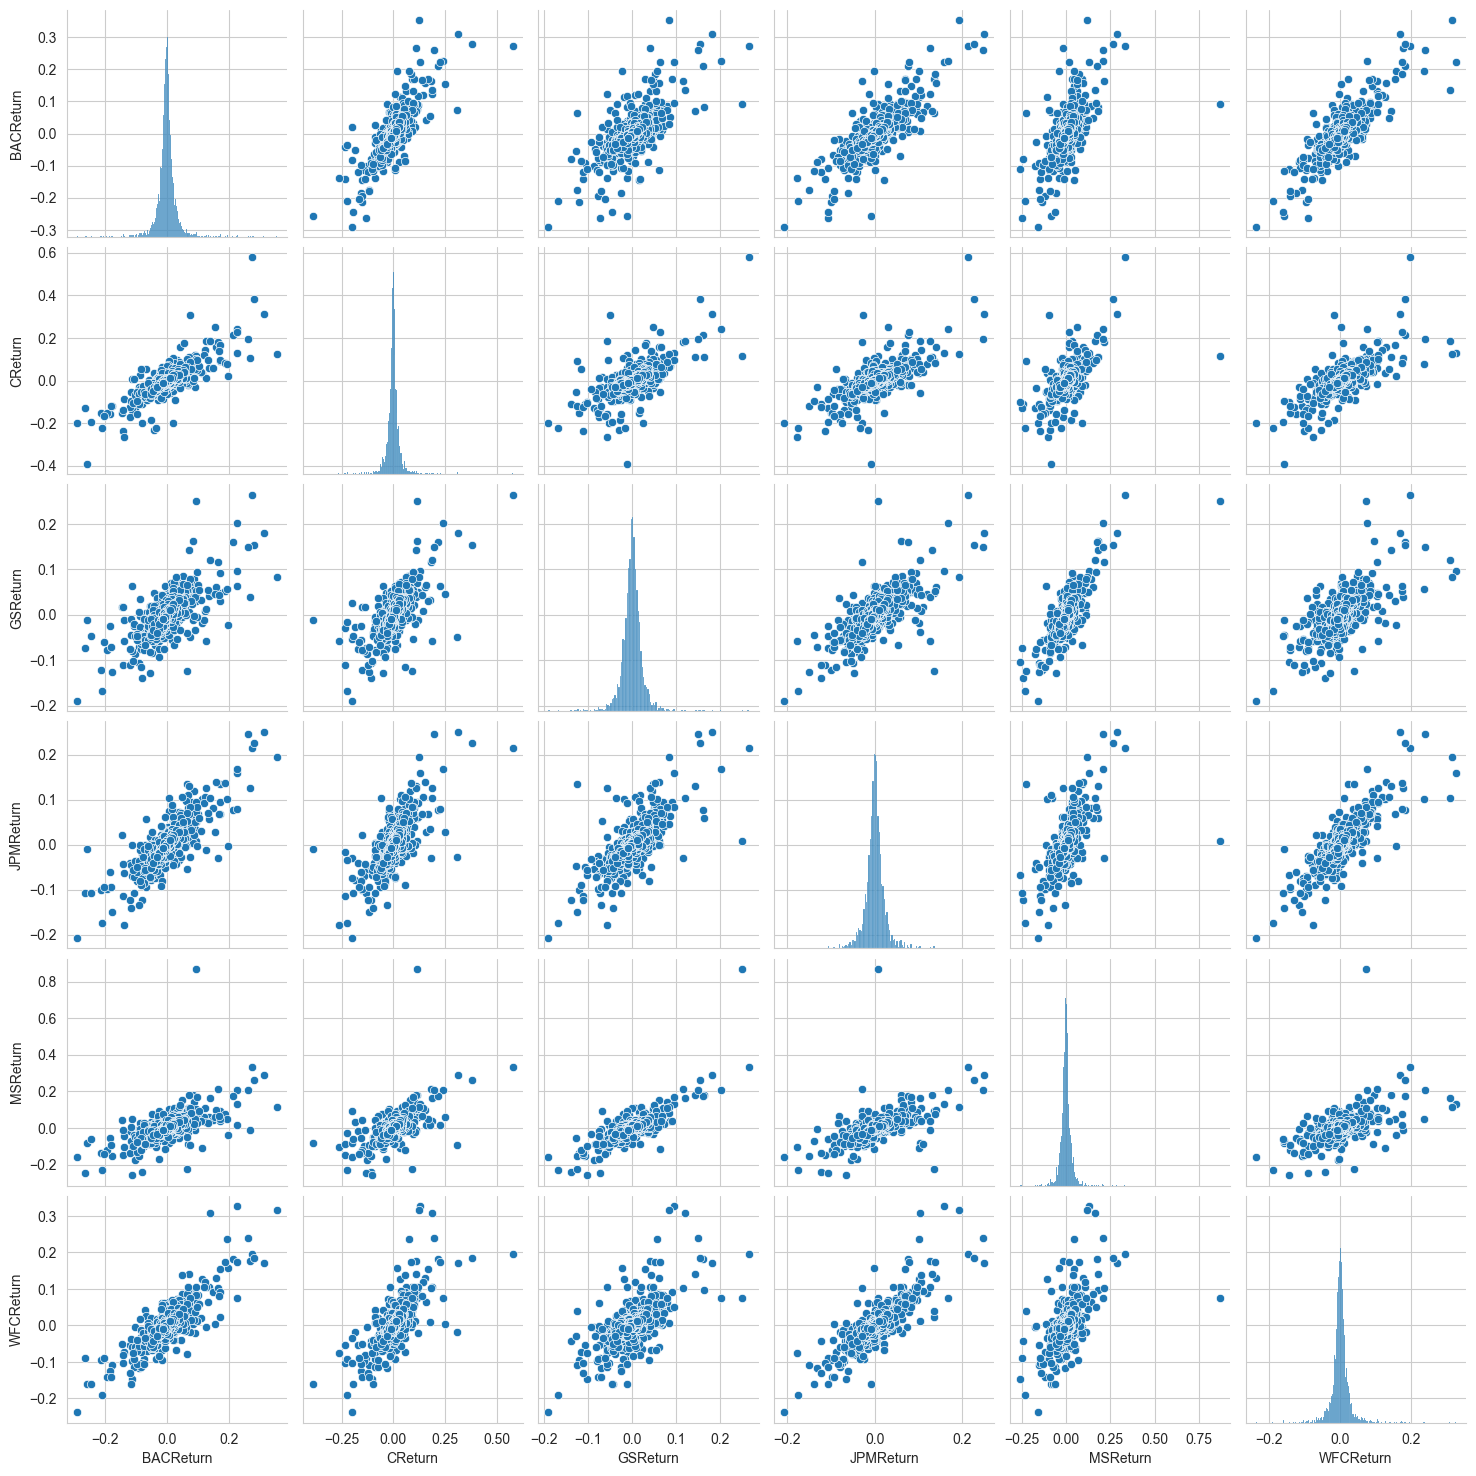

In [36]:
sns.pairplot(returns[1:])

Using this returns DataFrame, The date in which each bank stock had the best and worst single day returns is calculated ? 

In [37]:

    returns.idxmin()


BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

You should have noticed that Citigroup's largest drop and biggest gain were very close to one another.
[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [38]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

The standard deviation is calculated to classify the stock based on the risk over the entire time

In [39]:
returns.std()

BACReturn    0.036605
CReturn      0.038615
GSReturn     0.025371
JPMReturn    0.027670
MSReturn     0.037708
WFCReturn    0.030221
dtype: float64

CitiGroup is the riskiest profile over the years

In [40]:
returns.loc['2015-01-01':'2015-12-31'].std() #To find the riskiest stock for the year 2015

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

 Distplot is created using seaborn for the 2015 returns for Morgan Stanley .

C:\Users\ksadi\AppData\Local\Temp\ipykernel_9140\1046204574.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='MSReturn', ylabel='Density'>

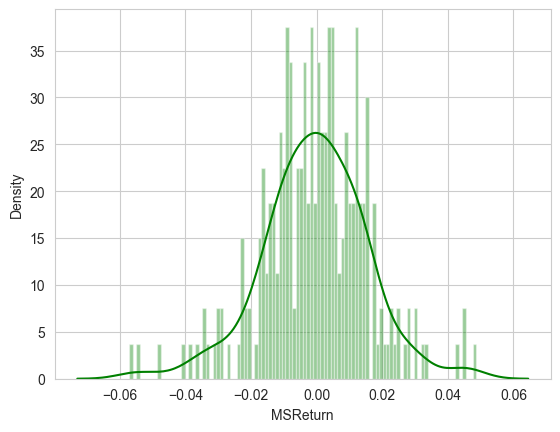

In [41]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=100)

Distplot is created  using seaborn of the 2008 returns for CitiGroup.

C:\Users\ksadi\AppData\Local\Temp\ipykernel_9140\2287840054.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='CReturn', ylabel='Density'>

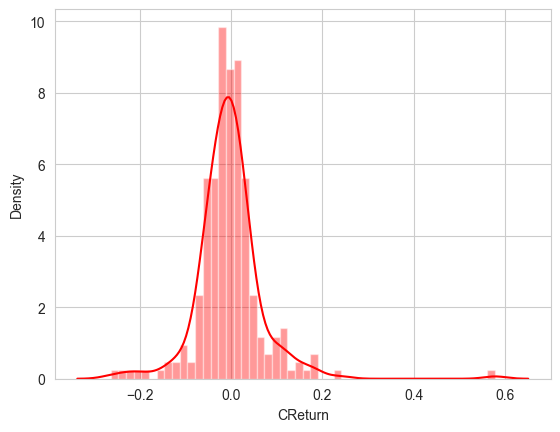

In [42]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=50)

In [43]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style('whitegrid')
    %matplotlib inline

    # Optional Plotly Method Imports
    import plotly
    import cufflinks as cf
    cf.go_offline()

 Line plot is created which shows the Close price for each bank for the entire index of time.

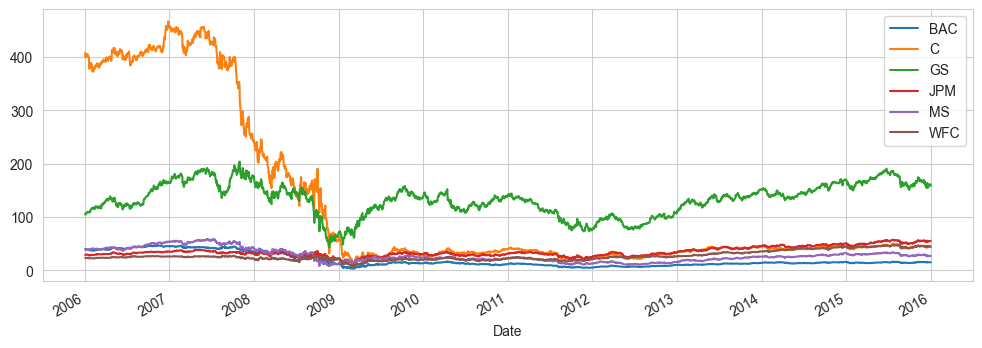

In [46]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [45]:
bank_stocks.xs(key='Close',axis=1,level='Stock info').iplot() #cufflin is used to make the grpah more presentable and intractable.